In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
# Loading the data
df = pd.read_csv('red_wine.csv')

In [3]:
############################### Part 3 (1) Creating HTML report #######################################33

In [4]:
# generating standard profiling report

profile = ProfileReport(df, title="Profiling Report")

In [5]:
# displaying the report as a set of widgets

profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\14104\anaconda3\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
C:\Users\14104\anaconda3\Lib\site-packages\ydata_profiling\model\typeset.py:125: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  not pdt.is_categorical_dtype(series)
C:\Users\14104\anaconda3\Lib\site-packages\ydata_profiling\model\typeset_relations.py:34: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pdt.is_categorical_dtype(series):
C:\Users\14104\anaconda3\Lib\site-packages\ydata_profiling\model\typeset.py:208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# generating HTML report

profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
########################## Part 3 (2) - Fitting a model using all the methods #####################3333

In [8]:
# encoding "type" feature using label encoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])

In [9]:
# Separating features and target variable

#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

X = df.drop("type", axis=1)
y = df["type"]

In [10]:
# setting up 10 fold cross validation procedure

from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [11]:
# defining baseline accuracy

baseline_accuracy = y.value_counts().max() / y.shape[0]
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline AUC: 0.5")

Baseline Accuracy: 0.5289
Baseline AUC: 0.5


In [12]:
# Baseline AUC for a random classifier is 0.5.

In [13]:
# evaluating all classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM Linear", SVC(kernel='linear', probability=True)),
    ("SVM RBF", SVC(kernel='rbf', probability=True)),
    ("Random Forest", RandomForestClassifier())
]

for name, model in models:
    accuracy = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    auc = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(roc_auc_score, needs_proba=True)).mean()
    
    print(f"{name} - Accuracy: {accuracy:.4f} | AUC: {auc:.4f}")

Logistic Regression - Accuracy: 0.7844 | AUC: 0.8758
Naive Bayes - Accuracy: 0.8248 | AUC: 0.8933
Decision Tree - Accuracy: 0.8124 | AUC: 0.8095
SVM Linear - Accuracy: 0.7931 | AUC: 0.8754
SVM RBF - Accuracy: 0.5358 | AUC: 0.8550
Random Forest - Accuracy: 0.8474 | AUC: 0.9189


In [14]:
########################## Part 3 (3) - Plotting ROC curve for Random Forest Classifier #####################3333

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Fitting Random Forest model

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Get predicted probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

In [19]:
# Computing ROC curve and ROC area

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

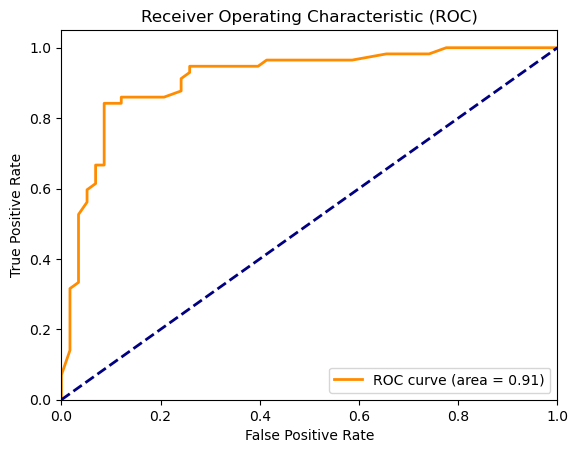

In [20]:
# Plot

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [21]:
########################## Part 3 (4) - Running Random Forest Classifer on white_wine.csv #####################3333

In [22]:
# loading the data

df1 = pd.read_csv("white_wine.csv")
X = df1.drop("type", axis=1)

In [23]:
# preprocessing the data

y = label_encoder.fit_transform(df1['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# training Random Forest classifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# computing AUC score and commenting
y_prob = clf.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc_score:.4f}")

# 5. Comment on performance
if auc_score > 0.9:
    print("The classifier has an excellent performance.")
elif auc_score > 0.8:
    print("The classifier has a very good performance.")
elif auc_score > 0.7:
    print("The classifier has a good performance.")
elif auc_score > 0.6:
    print("The classifier has a fair performance.")
else:
    print("The classifier has a poor performance.")

AUC Score: 0.9182
The classifier has an excellent performance.


In [26]:
########################## Part 3 (5) - Preferable model #####################3333

In [27]:
# Decision tree could be the most preferable model. It is the most visually interpretable model as it can be drawn as a tree
# diagram. But if the wine testing experts want to know the significance and effect of individual features on the outcome, 
# Logistic Regression might be preferable.If they're interested in probabilistic reasoning and dependencies between features,
# Naive Bayes could be valuable.